### Задание:
###### - Скачать все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, а также captcha подумайте как их можно обойти)
###### - Извлеките все описания этих вакансий
###### - Создайте DataFrame добавьте поле skills
###### - Переведите даты публикаций в datetime
###### - Постройте график опубликованных вакансий по датам
###### - Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
###### - Найдите те вакансии с использованием python, которые вам интересны
###### - Определите по полю skills какие навыки больше всего востребованы для этих вакансий
###### - Постройте график наиболее востребованных навыков для аналитика данных

In [2]:
import requests
from tqdm.auto import tqdm
import pandas as pd

In [3]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}'

In [4]:
url = f'https://api.hh.ru/vacancies'
params = {
    'employer_id':sber,
    'page':page,
    'per_page':num_per_page,
}
res = requests.get(url, params=params)

###### - Описание вакансий:

In [5]:
res.json()

{'items': [{'id': '68770674',
   'premium': False,
   'name': 'Старший менеджер по обслуживанию',
   'department': {'id': '3529-3529-prof', 'name': 'Сбер для экспертов'},
   'has_test': False,
   'response_letter_required': False,
   'area': {'id': '2076',
    'name': 'Талдом',
    'url': 'https://api.hh.ru/areas/2076'},
   'salary': {'from': 68500, 'to': None, 'currency': 'RUR', 'gross': True},
   'type': {'id': 'open', 'name': 'Открытая'},
   'address': {'city': 'Талдом',
    'street': None,
    'building': None,
    'description': None,
    'lat': 56.7308564,
    'lng': 37.5276003,
    'raw': 'Талдом',
    'metro': None,
    'metro_stations': [],
    'id': '7647975'},
   'response_url': None,
   'sort_point_distance': None,
   'published_at': '2022-08-15T09:25:01+0300',
   'created_at': '2022-08-15T09:25:01+0300',
   'archived': False,
   'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=68770674',
   'insider_interview': None,
   'url': 'https://api.hh.ru/v

In [6]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [7]:
vnum  = vacancies.get('pages')

In [8]:
all_vacancy_ids= []
for i in tqdm(range(vnum)):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={moscow}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

  0%|          | 0/20 [00:00<?, ?it/s]

In [9]:
vacs = []
for vac_id in tqdm(all_vacancy_ids):
    url = f'https://api.hh.ru/vacancies/{vac_id}'
    res = requests.get(url)
    vacs.append(res.json())

  0%|          | 0/1218 [00:00<?, ?it/s]

In [10]:
df = pd.json_normalize(vacs)

In [11]:
df.head()

id  premium relations  \
0  55415805    False        []   
1  68363939    False        []   
2  68899553    False        []   
3  67349462    False        []   
4  68704654    False        []   

                                                name insider_interview  \
0                     Менеджер по работе с клиентами              None   
1                             Финансовый консультант              None   
2  Разработчик интерфейсов/frontend разработчик (...              None   
3                        Старший клиентский менеджер              None   
4                              Стажер Data scientist              None   

   response_letter_required  address  allow_messages contacts  \
0                     False      NaN            True     None   
1                     False      NaN            True     None   
2                     False      NaN            True     None   
3                     False      NaN            True     None   
4                     False      NaN            True     None   

                                         description  ...  \
0  <p>Сбер — лучший работодатель России. У нас бо...  ...   
1  <p>Сбер — лучший работодатель России. У нас бо...  ...   
2  <p>В команду SberDevices ищем стажера JS. Мы н...  ...   
3  <p>Сбер — лучший работодатель России. У нас бо...  ...   
4  <p>Блок &quot;Сеть продаж&quot; курирует все ф...  ...   

  address.metro.station_id address.metro.line_id address.metro.lat  \
0                      NaN                   NaN               NaN   
1                     3.47                     3         55.743117   
2                   95.536                    95         55.740833   
3                      NaN                   NaN               NaN   
4                     4.73                     4         55.740544   

   address.metro.lng                             address.metro_stations  \
0                NaN                                                NaN   
1          37.564132  [{'station_name': 'Киевская', 'line_name': 'Ар...   
2          37.533333  [{'station_name': 'Кутузовская', 'line_name': ...   
3                NaN                                                NaN   
4          37.534100  [{'station_name': 'Кутузовская', 'line_name': ...   

   salary department test.required address.metro immediate_redirect_url  
0     NaN        NaN           NaN           NaN                    NaN  
1     NaN        NaN           NaN           NaN                    NaN  
2     NaN        NaN           NaN           NaN                    NaN  
3     NaN        NaN           NaN           NaN                    NaN  
4     NaN        NaN           NaN           NaN                    NaN  

[5 rows x 85 columns]

In [12]:
df_hh = df

In [13]:
df_hh

id  premium relations  \
0     55415805    False        []   
1     68363939    False        []   
2     68899553    False        []   
3     67349462    False        []   
4     68704654    False        []   
...        ...      ...       ...   
1213  68787346     True        []   
1214  67799534     True        []   
1215  67799754     True        []   
1216  67799537     True        []   
1217  67799535     True        []   

                                                   name insider_interview  \
0                        Менеджер по работе с клиентами              None   
1                                Финансовый консультант              None   
2     Разработчик интерфейсов/frontend разработчик (...              None   
3                           Старший клиентский менеджер              None   
4                                 Стажер Data scientist              None   
...                                                 ...               ...   
1213                        Старший клиентский менеджер              None   
1214                  Клиентский менеджер прямых продаж              None   
1215                     Менеджер по работе с клиентами              None   
1216                  Клиентский менеджер прямых продаж              None   
1217                  Клиентский менеджер прямых продаж              None   

      response_letter_required  address  allow_messages contacts  \
0                        False      NaN            True     None   
1                        False      NaN            True     None   
2                        False      NaN            True     None   
3                        False      NaN            True     None   
4                        False      NaN            True     None   
...                        ...      ...             ...      ...   
1213                     False      NaN            True     None   
1214                     False      NaN           False     None   
1215                     False      NaN            True     None   
1216                     False      NaN            True     None   
1217                     False      NaN           False     None   

                                            description  ...  \
0     <p>Сбер — лучший работодатель России. У нас бо...  ...   
1     <p>Сбер — лучший работодатель России. У нас бо...  ...   
2     <p>В команду SberDevices ищем стажера JS. Мы н...  ...   
3     <p>Сбер — лучший работодатель России. У нас бо...  ...   
4     <p>Блок &quot;Сеть продаж&quot; курирует все ф...  ...   
...                                                 ...  ...   
1213  <p>Сбер — лучший работодатель России. У нас бо...  ...   
1214  <p>Сбер — лучший работодатель России. У нас бо...  ...   
1215  <p>Сбер — лучший работодатель России. У нас бо...  ...   
1216  <p>Сбер — лучший работодатель России. У нас бо...  ...   
1217  <p>Сбер — лучший работодатель России. У нас бо...  ...   

     address.metro.station_id address.metro.line_id address.metro.lat  \
0                         NaN                   NaN               NaN   
1                        3.47                     3         55.743117   
2                      95.536                    95         55.740833   
3                         NaN                   NaN               NaN   
4                        4.73                     4         55.740544   
...                       ...                   ...               ...   
1213                      NaN                   NaN               NaN   
1214                      NaN                   NaN               NaN   
1215                      NaN                   NaN               NaN   
1216                      NaN                   NaN               NaN   
1217                      NaN                   NaN               NaN   

      address.metro.lng                             address.metro_stations  \
0                   NaN                                                NaN   
1             37.564132

In [14]:
df_hh['description_len'] = df_hh.description.apply(lambda x:len(x))
pd.options.display.max_colwidth = max(df_hh['description_len'])
df_hh['description'] = df_hh.description.apply(lambda y: y.replace('<p>', '').replace('</p>', '').replace('<strong>', '').replace('</strong>', '').replace('<ul>', '').replace('<li>', '').replace('</li>', '').replace('</ul>', ''))
df_hh

id  premium relations  \
0     55415805    False        []   
1     68363939    False        []   
2     68899553    False        []   
3     67349462    False        []   
4     68704654    False        []   
...        ...      ...       ...   
1213  68787346     True        []   
1214  67799534     True        []   
1215  67799754     True        []   
1216  67799537     True        []   
1217  67799535     True        []   

                                                                     name  \
0                                          Менеджер по работе с клиентами   
1                                                  Финансовый консультант   
2     Разработчик интерфейсов/frontend разработчик (стажер) в SberDevices   
3                                             Старший клиентский менеджер   
4                                                   Стажер Data scientist   
...                                                                   ...   
1213                                          Старший клиентский менеджер   
1214                                    Клиентский менеджер прямых продаж   
1215                                       Менеджер по работе с клиентами   
1216                                    Клиентский менеджер прямых продаж   
1217                                    Клиентский менеджер прямых продаж   

     insider_interview  response_letter_required  address  allow_messages  \
0                 None                     False      NaN            True   
1                 None                     False      NaN            True   
2                 None                     False      NaN            True   
3                 None                     False      NaN            True   
4                 None                     False      NaN            True   
...                ...                       ...      ...             ...   
1213              None                     False      NaN            True   
1214              None                     False      NaN           False   
1215              None                     False      NaN            True   
1216              None                     False      NaN            True   
1217              None                     False      NaN           False   

     contacts  \
0        None   
1        None   
2        None   
3        None   
4        None   
...       ...   
1213     None   
1214     None   
1215     None   
1216     None   
1217     None   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [15]:
df_hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 86 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            1218 non-null   object 
 1   premium                       1218 non-null   bool   
 2   relations                     1218 non-null   object 
 3   name                          1218 non-null   object 
 4   insider_interview             0 non-null      object 
 5   response_letter_required      1218 non-null   bool   
 6   address                       0 non-null      float64
 7   allow_messages                1218 non-null   bool   
 8   contacts                      0 non-null      object 
 9   description                   1218 non-null   object 
 10  branded_description           975 non-null    object 
 11  vacancy_constructor_template  0 non-null      object 
 12  key_skills                    1218 non-null   object 
 13  acc

In [16]:
df_hh[['id', 'name', 'description']]

id  \
0     55415805   
1     68363939   
2     68899553   
3     67349462   
4     68704654   
...        ...   
1213  68787346   
1214  67799534   
1215  67799754   
1216  67799537   
1217  67799535   

                                                                     name  \
0                                          Менеджер по работе с клиентами   
1                                                  Финансовый консультант   
2     Разработчик интерфейсов/frontend разработчик (стажер) в SberDevices   
3                                             Старший клиентский менеджер   
4                                                   Стажер Data scientist   
...                                                                   ...   
1213                                          Старший клиентский менеджер   
1214                                    Клиентский менеджер прямых продаж   
1215                                       Менеджер по работе с клиентами   
1216                                    Клиентский менеджер прямых продаж   
1217                                    Клиентский менеджер прямых продаж   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            description  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Сбер — лучший работодатель России. У нас более 60 компаний экосистемы и 14 тысяч подразделений по всей стране. Сбер ищет клиентского менеджера для работы в мобильных офисах. Это специалист, который консультирует клиентов по продуктам, услугам и сервисам Сбера в торговых центрах, аэропортах и гипермаркетах. Эта работа для активных и общительных людей, которые стремятся к карьере и финансово

###### - Создание DataFrame и добавление поля skills:

In [17]:
df_hh['skills'] = df_hh['key_skills'].apply(lambda s: [x.get('name') for x in s]).tolist()


In [18]:
df_hh[['id', 'name', 'skills']]

id  \
0     55415805   
1     68363939   
2     68899553   
3     67349462   
4     68704654   
...        ...   
1213  68787346   
1214  67799534   
1215  67799754   
1216  67799537   
1217  67799535   

                                                                     name  \
0                                          Менеджер по работе с клиентами   
1                                                  Финансовый консультант   
2     Разработчик интерфейсов/frontend разработчик (стажер) в SberDevices   
3                                             Старший клиентский менеджер   
4                                                   Стажер Data scientist   
...                                                                   ...   
1213                                          Старший клиентский менеджер   
1214                                    Клиентский менеджер прямых продаж   
1215                                       Менеджер по работе с клиентами   
1216                                    Клиентский менеджер прямых продаж   
1217                                    Клиентский менеджер прямых продаж   

                                                                                                                                skills  
0                                                                                                                                   []  
1                                                                          [Работа в команде, Активные продажи, Телефонные переговоры]  
2                                                                                            [JavaScript, CSS, HTML, TypeScript, CSS3]  
3                                                                                                                                   []  
4                                                                                                                        [Python, SQL]  
...                                                                                                                                ...  
1213  [Деловая переписка, Деловое общение, Развитие продаж, Деловая коммуникация, Заключение договоров, B2C продажи, Активные продажи]  
1214                                          [Проведение презентаций, Поиск и привлечение клиентов, Холодные продажи, Прямые продажи]  
1215                                                                                              [Активные продажи, Холодные продажи]  
1216                                          [Проведение презентаций, Поиск и привлечение клиентов, Холодные продажи, Прямые продажи]  
1217                                          [Проведение презентаций, Поиск и привлечение клиентов, Холодные продажи, Прямые продажи]  

[1218 rows x 3 columns]

###### - Переведите даты публикаций в datetime:

In [19]:
df_hh['published_at']

0       2022-08-17T13:51:57+0300
1       2022-08-01T18:57:37+0300
2       2022-08-17T20:37:17+0300
3       2022-08-15T11:51:52+0300
4       2022-08-11T22:06:49+0300
                  ...           
1213    2022-08-17T09:09:31+0300
1214    2022-08-17T09:13:22+0300
1215    2022-08-17T09:13:22+0300
1216    2022-08-17T09:13:23+0300
1217    2022-08-17T09:13:22+0300
Name: published_at, Length: 1218, dtype: object

In [20]:
df_hh['published_datetime'] = pd.to_datetime(df_hh['published_at'])

In [21]:
df_hh[['id', 'name', 'published_datetime']]

id  \
0     55415805   
1     68363939   
2     68899553   
3     67349462   
4     68704654   
...        ...   
1213  68787346   
1214  67799534   
1215  67799754   
1216  67799537   
1217  67799535   

                                                                     name  \
0                                          Менеджер по работе с клиентами   
1                                                  Финансовый консультант   
2     Разработчик интерфейсов/frontend разработчик (стажер) в SberDevices   
3                                             Старший клиентский менеджер   
4                                                   Стажер Data scientist   
...                                                                   ...   
1213                                          Старший клиентский менеджер   
1214                                    Клиентский менеджер прямых продаж   
1215                                       Менеджер по работе с клиентами   
1216                                    Клиентский менеджер прямых продаж   
1217                                    Клиентский менеджер прямых продаж   

            published_datetime  
0    2022-08-17 13:51:57+03:00  
1    2022-08-01 18:57:37+03:00  
2    2022-08-17 20:37:17+03:00  
3    2022-08-15 11:51:52+03:00  
4    2022-08-11 22:06:49+03:00  
...                        ...  
1213 2022-08-17 09:09:31+03:00  
1214 2022-08-17 09:13:22+03:00  
1215 2022-08-17 09:13:22+03:00  
1216 2022-08-17 09:13:23+03:00  
1217 2022-08-17 09:13:22+03:00  

[1218 rows x 3 columns]

In [22]:
df_hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 88 columns):
 #   Column                        Non-Null Count  Dtype                                
---  ------                        --------------  -----                                
 0   id                            1218 non-null   object                               
 1   premium                       1218 non-null   bool                                 
 2   relations                     1218 non-null   object                               
 3   name                          1218 non-null   object                               
 4   insider_interview             0 non-null      object                               
 5   response_letter_required      1218 non-null   bool                                 
 6   address                       0 non-null      float64                              
 7   allow_messages                1218 non-null   bool                                 
 8 

###### - Постройте график опубликованных вакансий по датам:

In [23]:
df_hh_date = df_hh[['id', 'published_datetime']]
df_hh_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype                                
---  ------              --------------  -----                                
 0   id                  1218 non-null   object                               
 1   published_datetime  1218 non-null   datetime64[ns, pytz.FixedOffset(180)]
dtypes: datetime64[ns, pytz.FixedOffset(180)](1), object(1)
memory usage: 19.2+ KB


In [24]:
df_hh_date

id        published_datetime
0     55415805 2022-08-17 13:51:57+03:00
1     68363939 2022-08-01 18:57:37+03:00
2     68899553 2022-08-17 20:37:17+03:00
3     67349462 2022-08-15 11:51:52+03:00
4     68704654 2022-08-11 22:06:49+03:00
...        ...                       ...
1213  68787346 2022-08-17 09:09:31+03:00
1214  67799534 2022-08-17 09:13:22+03:00
1215  67799754 2022-08-17 09:13:22+03:00
1216  67799537 2022-08-17 09:13:23+03:00
1217  67799535 2022-08-17 09:13:22+03:00

[1218 rows x 2 columns]

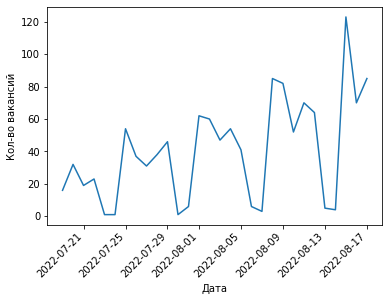

In [25]:
import matplotlib
import matplotlib.pyplot as plt
df_hh_date.groupby([df_hh_date.published_datetime.dt.date])['id'].count().plot(kind = 'line', xlabel = 'Дата', ylabel = 'Кол-во вакансий')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='medium')
plt.show()

###### - Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий:

In [26]:
df_hh_date['day_name'] = df_hh_date.published_datetime.dt.day_name()

C:\Users\vitg1\AppData\Local\Temp\ipykernel_16808\2361581018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hh_date['day_name'] = df_hh_date.published_datetime.dt.day_name()


In [27]:
df_hh_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype                                
---  ------              --------------  -----                                
 0   id                  1218 non-null   object                               
 1   published_datetime  1218 non-null   datetime64[ns, pytz.FixedOffset(180)]
 2   day_name            1218 non-null   object                               
dtypes: datetime64[ns, pytz.FixedOffset(180)](1), object(2)
memory usage: 28.7+ KB


In [28]:
df_hh_date

id        published_datetime   day_name
0     55415805 2022-08-17 13:51:57+03:00  Wednesday
1     68363939 2022-08-01 18:57:37+03:00     Monday
2     68899553 2022-08-17 20:37:17+03:00  Wednesday
3     67349462 2022-08-15 11:51:52+03:00     Monday
4     68704654 2022-08-11 22:06:49+03:00   Thursday
...        ...                       ...        ...
1213  68787346 2022-08-17 09:09:31+03:00  Wednesday
1214  67799534 2022-08-17 09:13:22+03:00  Wednesday
1215  67799754 2022-08-17 09:13:22+03:00  Wednesday
1216  67799537 2022-08-17 09:13:23+03:00  Wednesday
1217  67799535 2022-08-17 09:13:22+03:00  Wednesday

[1218 rows x 3 columns]

In [29]:
df_hh_date.day_name.mode()

0    Monday
Name: day_name, dtype: object

In [30]:
df_hh_date.groupby('day_name')['id'].count()

day_name
Friday       174
Monday       324
Saturday      13
Sunday        14
Thursday     181
Tuesday      265
Wednesday    247
Name: id, dtype: int64

###### - Найдите те вакансии с использованием python, которые вам интересны:

In [31]:
id = df_hh.skills.apply(lambda x: 'Python' in x)
df_hh_interesting = df_hh[id]
df_hh_interesting = df_hh_interesting[df_hh_interesting['name'].str.contains('аналитик') | df_hh_interesting['name'].str.contains('Аналитик')]

In [32]:
df_hh_interesting[['id', 'name', 'description', 'skills']]

id  \
24    66523856   
101   68619804   
105   68509921   
112   67752294   
152   67414601   
176   68379084   
305   66099561   
342   68662845   
531   68363814   
552   68641184   
606   68659358   
790   68643635   
911   68123813   
1081  68235765   

                                                                                                   name  \
24                                                                                         Аналитик SQL   
101                                                                                            Аналитик   
105                                                                                     Аналитик данных   
112                                                                               Аналитик данных (SQL)   
152                                                                                            Аналитик   
176                                                                                Продуктовый аналитик   
305                                                                 Data аналитик (Рекламная платформа)   
342                                                                      Аналитик в команду кампейнинга   
531                                                                                Аналитик SberDevices   
552   Аналитик данных (лист-менеджер) в команду разработки персональных коммуникаций Розничного бизнеса   
606                                                           Аналитик по цифровому описанию архитектур   
790                                                                           Системный аналитик (ППРБ)   
911                                                                                       Дата аналитик   
1081                                                                      Системный аналитик (Big data)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [33]:
len(df_hh_interesting.index)

14

###### - Определите по полю skills какие навыки больше всего востребованы для этих вакансий:

In [34]:
list_int_vac_skills = df_hh_interesting['key_skills'].apply(lambda t: ','.join([x.get('name') for x in t])).tolist()
from collections import Counter
top_int_skills = Counter(x for x in ','.join(list_int_vac_skills).split(',') if x != '')
top_int_skills.most_common(1)

[('Python', 14)]

###### - Постройте график наиболее востребованных навыков для аналитика данных:

In [35]:
df_hh_da = df_hh[(df_hh['name'].str.contains('аналитик') | df_hh['name'].str.contains('Аналитик')) & (df_hh['name'].str.contains('данн') | df_hh['name'].str.contains('Data') | df_hh['name'].str.contains('data'))]

In [36]:
df_hh_da[['id', 'name', 'description', 'skills']]

id  \
105   68509921   
112   67752294   
113   68322832   
129   68650456   
132   68783029   
206   67574660   
230   68773305   
305   66099561   
311   68699513   
338   68042492   
346   68293172   
418   68855023   
487   55420381   
552   68641184   
643   68043883   
783   68781648   
913   68805233   
1013  49684144   
1081  68235765   

                                                                                                   name  \
105                                                                                     Аналитик данных   
112                                                                               Аналитик данных (SQL)   
113                                                                            Менеджер-аналитик данных   
129                                                                 Риск-аналитик/Аналитик данных (SQL)   
132                                                                   Аналитик данных , Кампании продаж   
206                                                                                    Аналитик BigData   
230                                      Аналитик данных в команду Интеллектуального IVR (Data Analyst)   
305                                                                 Data аналитик (Рекламная платформа)   
311                                                                                       Data Аналитик   
338                                           Аналитик данных (Лист-менеджер) в команду Кредитные карты   
346                                Senior Business аналитик (SberData, Управление корпоративных данных)   
418                                                                                       Data-аналитик   
487                                                                         Аналитик по качеству данных   
552   Аналитик данных (лист-менеджер) в команду разработки персональных коммуникаций Розничного бизнеса   
643                                                             Менеджер по сегментации (data аналитик)   
783                                                                          Data engineer/Аналитик DWH   
913                                    Системный аналитик (SberData, Управление корпоративными данными)   
1013                     Системный архитектор/аналитик (Команда архитектуры Хранилища данных, SberData)   
1081                                                                      Системный аналитик (Big data)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [37]:
len(df_hh_da)

19

In [38]:
list_da_vac_skills = df_hh_da['key_skills'].apply(lambda t: ','.join([x.get('name') for x in t])).tolist()
top_da_skills = Counter(x for x in ','.join(list_da_vac_skills).split(',') if x != '')
top_da_skills.most_common()

[('SQL', 8),
 ('Python', 5),
 ('Анализ данных', 3),
 ('Atlassian Jira', 3),
 ('Big Data', 3),
 ('Excel', 2),
 ('Базы данных', 2),
 ('Teradata', 2),
 ('PostgreSQL', 2),
 ('Java', 2),
 ('Spark', 2),
 ('Статистический анализ', 1),
 ('Qlik Sense', 1),
 ('Математическая статистика', 1),
 ('Atlassian Confluence', 1),
 ('Аналитическое мышление', 1),
 ('MS PowerPoint', 1),
 ('Agile', 1),
 ('Аналитика', 1),
 ('Kafka', 1),
 ('Data Mining', 1),
 ('Oracle BI', 1),
 ('Работа в команде', 1),
 ('Умение работать в команде', 1),
 ('Умение работать в коллективе', 1),
 ('Способность обучать других', 1),
 ('Материальная ответственность', 1),
 ('Data Analysis', 1),
 ('VBA', 1),
 ('ORACLE', 1),
 ('DWH', 1),
 ('Hadoop', 1),
 ('Greenplum', 1),
 ('ETL', 1)]